<a href="https://colab.research.google.com/github/Vishwanath1999/dcgan_pytorch/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape = (encoding_dim, ))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
11493376/11490434 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)


In [5]:
autoencoder.fit(x_train, x_train,
                epochs = 50,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test,x_test))
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 4s 63us/step - loss: 0.2761 - val_loss: 0.1914
Epoch 2/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1723 - val_loss: 0.1547
Epoch 3/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.1458 - val_loss: 0.1357
Epoch 4/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.1306 - val_loss: 0.1231
Epoch 5/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.1198 - val_loss: 0.1142
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1121 - val_loss: 0.1077
Epoch 7/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.1066 - val_loss: 0.1031
Epoch 8/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.1026 - val_loss: 0.0997
Epoch 9/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0997 - val_loss: 0.09

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


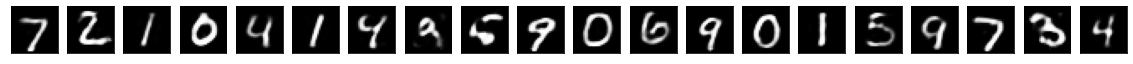

In [9]:
n = 20
plt.figure(figsize = (20,4))
for i in range(n):
  #input images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #decoded images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(decoded_images[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()